# Assignment 3 - UFO Sightings

### Author: Kenan Malale Kasongo
### Student Number: 220024976
### Date: 10th April 2024
### Source: Kaggle
### GitHub url: [Github](https://github.com/KenanK0/Learning-from-data-assignment2)

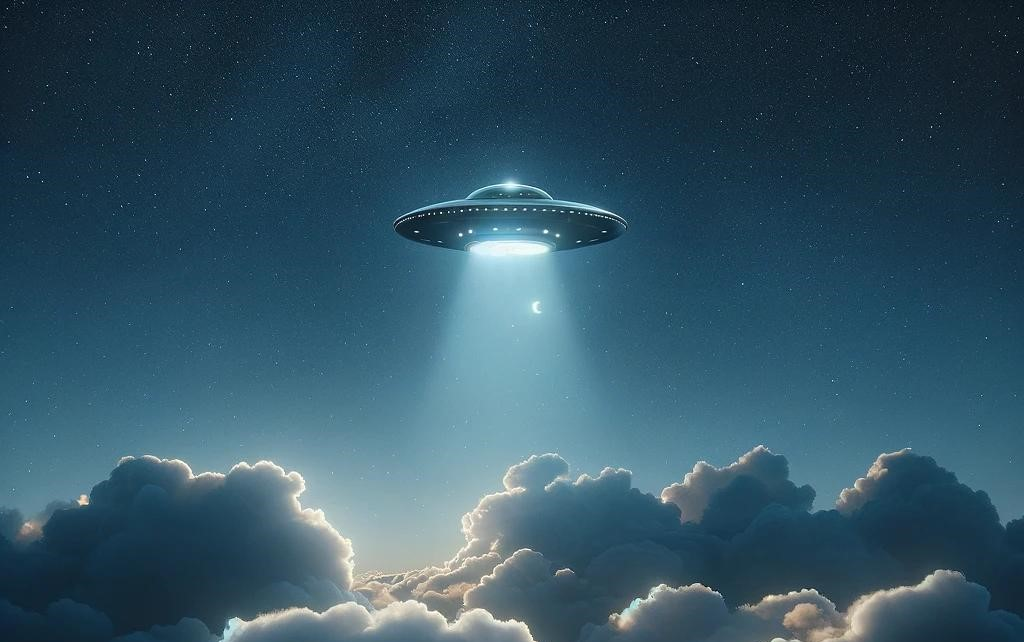

# Context



This dataset is a collection of UFO sighting reports spanning several decades, with entries as early as 1949. It includes details such as the date and time of the sighting, the location (city, state, and country), the shape of the observed UFO, the duration of the sighting both in seconds and in a descriptive format (e.g., "45 minutes"), and comments describing the event.
Also, the dataset records when each report was posted to a database or website, along with geographical coordinates (latitude and longitude) for each sighting.

# Data Description

Metadata of the dataset

1. **datetime:** The date and time of the UFO sighting.
2. **city:** The city where the UFO sighting was reported.
3. **state:** The state or province where the UFO sighting was reported.
4. **country:** The country where the UFO sighting was reported.
5. **shape:** The shape of the reported UFO as described by the witness.
6. **duration (seconds):** The duration of the UFO sighting in seconds.
7. **duration (hours/min):** The duration of the UFO sighting in hours and minutes.
8. **comments:** Additional comments or descriptions provided by the witnesses regarding the UFO sighting.
9. **date posted:** The date when the UFO sighting report was posted.
10. **latitude:** The latitude coordinate of the UFO sighting location.
11. **longitude:** The longitude coordinate of the UFO sighting location.


# Importing Libraries and Loading Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import gmean
import matplotlib.pyplot as plt  # matplotlib for plotting
import seaborn as sns  # seaborn to help with visualizations
from subprocess import check_output  # check files in directory
from wordcloud import WordCloud # For WorldCloud

import plotly.graph_objs as go
from plotly.offline import iplot

# Loading Data

In [3]:
ufo_db = '/content/drive/MyDrive/Colab_Notebooks/UFO_sightings.csv' # Dataset file path
ufo_data = pd.read_csv(ufo_db, low_memory=False)

## Peek at the Data

Checking some attributes of the data using .columns, .head, .index, .describe, etc.



In [4]:
ufo_data.columns


Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [5]:
ufo_data.shape

(80332, 11)

---



---
The dataset has 80332 rows and 11 columns

---



---



In [6]:
#First 5
ufo_data.head(5)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [7]:
#Last 5
ufo_data.tail(5)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.477778


# Data cleaning

In [8]:
# This code analyzes null (missing) values in the 'ufo_data' DataFrame. It calculates the number
# and percentage of missing values for each column, then displays the results sorted by
# percentage in descending order.
nulvals = ufo_data.isnull().sum()
nulpct = (nulvals / len(ufo_data))*100
print(' Null Values (% of entries):')
print(round(nulpct.sort_values(ascending=False),2))

 Null Values (% of entries):
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
datetime                 0.00
city                     0.00
duration (seconds)       0.00
duration (hours/min)     0.00
date posted              0.00
latitude                 0.00
longitude                0.00
dtype: float64


In [9]:
# CLEAN Null values from dataset
ufo_data = pd.read_csv(ufo_db,
                        low_memory = False,
                        na_values = ['UNKNOWN','UNK'],
                        na_filter = True,
                        skip_blank_lines = True)  # load dataset without NA values

# Choose columns to work with based on our initial questions
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
        'comments', 'date posted', 'latitude',
       'longitude ']

# After tidying data and choosing what to work with, create dataframe to work with
ufo_data = pd.DataFrame(data=ufo_data, columns=ufo_subcols)

# ...drop null values
ufo_data = ufo_data.dropna(thresh=8)

#...reset the index
ufo_data = ufo_data.reset_index(drop=True)

# EXTRACT LATITUDES #
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'],errors = 'coerce')  # latitudes as numerics
ufo_data['longitude '] = pd.to_numeric(ufo_data['longitude '], errors='coerce')

# CHANGE VARIABLES UFO_DATE IN SCRIPT 1-1-18
ufo_date = ufo_data.datetime.str.replace('24:00', '00:00')  # clean illegal values
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')  # now in datetime

ufo_data['datetime'] = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')




## Questions

**Some broad questions came to mind:**

* **Probability:** Statistically, where and when am I most likely to see a UFO? What should it look like?
* **Geography:** Where do UFO sightings occur the most?
* **Seasonality:** Is there a popular time during the year that UFO sightings happen?
* **Consistency:** Are there frequently used descriptions in the 'shapes' and 'comments' sections?

Other fun questions:

Is there a correlation between shape and location?


# Data cleaning

In [10]:
# CLEAN Null values from dataset
ufo_data = pd.read_csv(ufo_db,
                        low_memory = False,
                        na_values = ['UNKNOWN','UNK'],
                        na_filter = True,
                        skip_blank_lines = True)  # load dataset without NA values

# Choose columns to work with based on our initial questions
ufo_subcols = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
        'comments', 'date posted', 'latitude',
       'longitude ']

# After tidying data and choosing what to work with, create dataframe to work with
ufo_data = pd.DataFrame(data=ufo_data, columns=ufo_subcols)

# ...drop null values
ufo_data = ufo_data.dropna(thresh=8)

#...reset the index
ufo_data = ufo_data.reset_index(drop=True)

# EXTRACT LATITUDES #
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'],errors = 'coerce')  # latitudes as numerics
ufo_data['longitude '] = pd.to_numeric(ufo_data['longitude '], errors='coerce')

# CHANGE VARIABLES UFO_DATE IN SCRIPT 1-1-18
ufo_date = ufo_data.datetime.str.replace('24:00', '00:00')  # clean illegal values
ufo_date = pd.to_datetime(ufo_date, format='%m/%d/%Y %H:%M')  # now in datetime

ufo_data['datetime'] = ufo_data.datetime.str.replace('24:00', '00:00')
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')

In [11]:
ufo_data.shape


(80257, 10)

# Descriptive Analysis

In [12]:
# Extract the year from 'datetime'
ufo_data['year'] = ufo_data['datetime'].dt.year

# Ensure 'duration (seconds)' is numeric
ufo_data['duration (seconds)'] = pd.to_numeric(ufo_data['duration (seconds)'], errors='coerce')


In [13]:
# Descriptive statistics for the entire dataset
numeric_data = ufo_data.select_dtypes(include=[np.number])
numeric_data.describe()



,duration (seconds),latitude,longitude,year
count,8.025400e+04,80256.000000,80257.000000,80257.000000
mean,8.242183e+03,38.133879,-86.853875,2003.854256
std,5.915651e+05,10.438674,39.564286,10.423728
min,1.000000e-03,-82.862752,-176.658056,1906.000000
25%,3.000000e+01,34.136111,-112.073333,2001.000000
50%,1.800000e+02,39.414167,-87.906389,2006.000000
75%,6.000000e+02,42.787500,-78.781389,2011.000000
max,9.783600e+07,72.700000,178.441900,2014.000000


In [14]:
# Group by 'year' and calculate statistics for numeric columns, including percentiles
yearly_stats = ufo_data.groupby('year')['duration (seconds)'].agg(['count', 'mean', 'std', 'min',
                                                                    ('25%', lambda x: x.quantile(0.25)),
                                                                    ('50%', lambda x: x.quantile(0.5)),
                                                                    ('75%', lambda x: x.quantile(0.75)),
                                                                    'max']).reset_index()

# Calculating range and variance separately and then adding them to the DataFrame
yearly_range = ufo_data.groupby('year')['duration (seconds)'].apply(lambda x: x.max() - x.min()).reset_index(name='range')
yearly_variance = ufo_data.groupby('year')['duration (seconds)'].var().reset_index(name='variance')

# Merging the additional stats back to the main DataFrame
yearly_stats = yearly_stats.merge(yearly_range, on='year').merge(yearly_variance, on='year')

# Format the DataFrame for a nicer display
formatted_yearly_stats = yearly_stats.style.format({
    'Number of Sightings': '{:.0f}',
    'mean': '{:,.2f}',
    'std': '{:,.2f}',
    'min': '{:,.2f}',
    '25%': '{:,.2f}',
    '50%': '{:,.2f}',
    '75%': '{:,.2f}',
    'max': '{:,.2f}',
    'range': '{:,.2f}',
    'variance': '{:,.2f}'
}).set_properties(**{
    'text-align': 'right',
    'border-color': 'black',
    'background-color': '#e8f0fe'  # Soft blue background
}).set_table_styles([
    {
        'selector': 'th',
        'props': [
            ('background-color', '#0064b4'),  # Darker blue header
            ('color', 'white'),
            ('text-align', 'center'),
            ('font-weight', 'bold')
        ]
    },
    {
        'selector': 'tr:nth-child(even)',
        'props': [
            ('background-color', '#f2f7ff')  # Lighter blue for even rows
        ]
    },
    {  # Highlight max & min with colors
        'selector': 'td',
        'props': [
            ('color', lambda x: 'red' if x == yearly_stats.max().max() else 'green' if x == yearly_stats.min().min() else 'black')
        ]
    }
]) .set_caption("Yearly UFO Sightings Statistics")
# Display the styled DataFrame
formatted_yearly_stats



,year,count,mean,std,min,25%,50%,75%,max,range,variance
0,1906,1,"10,800.00",nan,"10,800.00","10,800.00","10,800.00","10,800.00","10,800.00",0.00,nan
1,1910,2,120.00,0.00,120.00,120.00,120.00,120.00,120.00,0.00,0.00
2,1916,1,60.00,nan,60.00,60.00,60.00,60.00,60.00,0.00,nan
3,1920,1,60.00,nan,60.00,60.00,60.00,60.00,60.00,0.00,nan
4,1925,1,60.00,nan,60.00,60.00,60.00,60.00,60.00,0.00,nan
5,1929,1,60.00,nan,60.00,60.00,60.00,60.00,60.00,0.00,nan
6,1930,1,"1,200.00",nan,"1,200.00","1,200.00","1,200.00","1,200.00","1,200.00",0.00,nan
7,1931,2,930.00,"1,230.37",60.00,495.00,930.00,"1,365.00","1,800.00","1,740.00","1,513,800.00"
8,1933,1,"1,800.00",nan,"1,800.00","1,800.00","1,800.00","1,800.00","1,800.00",0.00,nan
9,1934,1,5.00,nan,5.00,5.00,5.00,5.00,5.00,0.00,nan


#Graphs



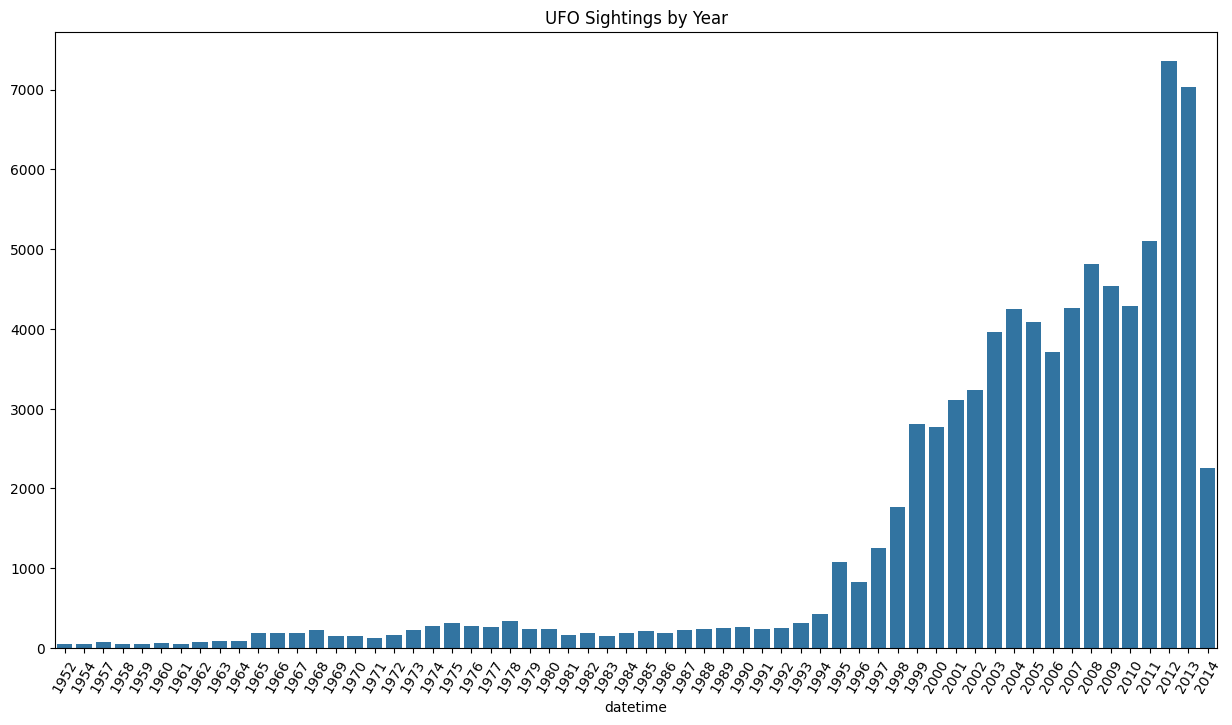

In [15]:
ufo_yr = ufo_date.dt.year  # series with the year exclusively

## Set axes ##
years_data = ufo_yr.value_counts()
years_index = years_data.index  # x ticks

#to access values directly
years_values = years_data.values

## Create Bar Plot ##
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')

years_plot = sns.barplot(x=years_index[:60], y=years_values[:60])


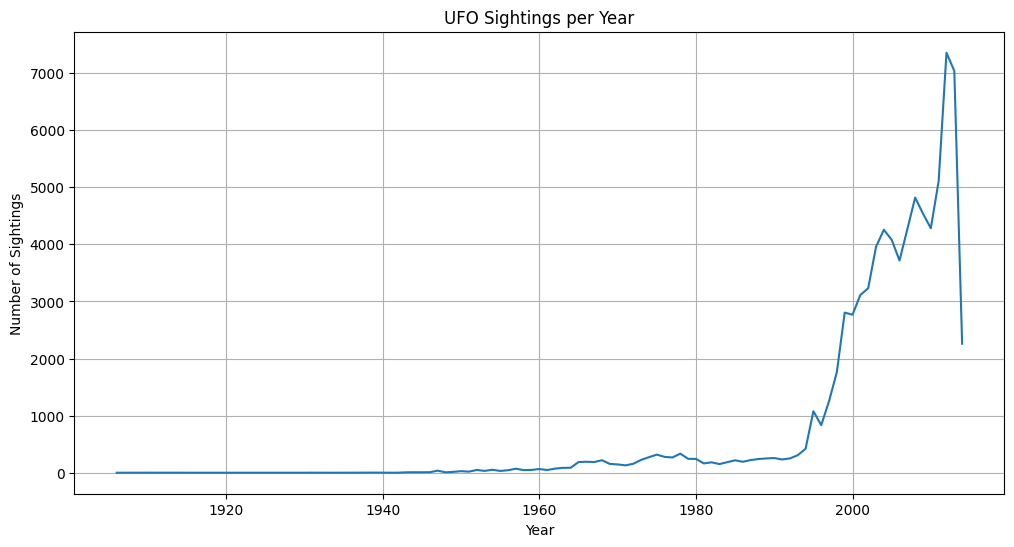

In [16]:
# Group data by year and count sightings
sightings_per_year = ufo_data.groupby(ufo_data['datetime'].dt.year).size()

# Plotting
plt.figure(figsize=(12, 6))
sightings_per_year.plot(kind='line')
plt.title('UFO Sightings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.show()



2012 got the most reported sightings 😆, maybe everyone was ready for the Mayan apocalypse that never came, perhaps people were just seeing more "signs" in the sky—wishful thinking for a dramatic exit or a new beginning!


#BoxPlot

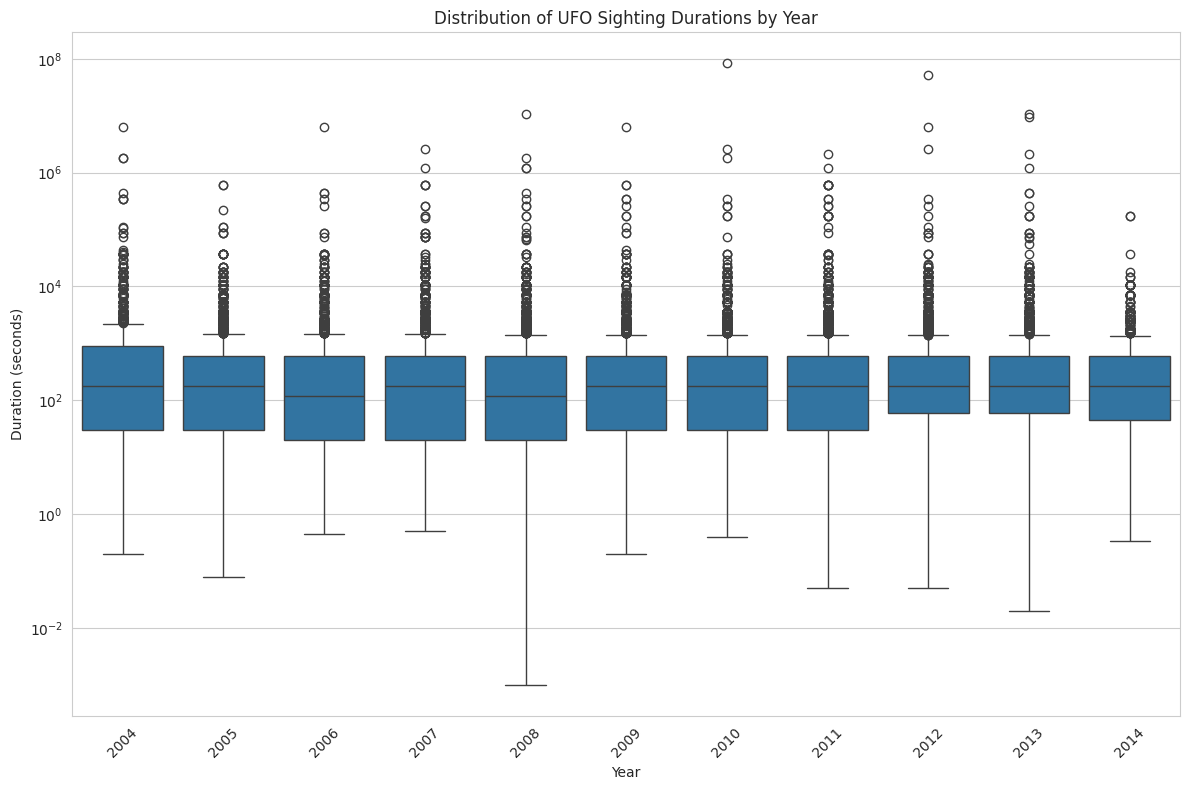

In [17]:
sns.set_style("whitegrid")

# Filter data to include only relevant years if necessary (last 10 years)
filtered_data = ufo_data[ufo_data['year'] >= ufo_data['year'].max() - 10]

# Creating a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='duration (seconds)', data=filtered_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Distribution of UFO Sighting Durations by Year')
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')
plt.yscale('log')  # Using a log scale for the y-axis to better handle wide distributions
plt.tight_layout()  # Adjust layout
plt.show()

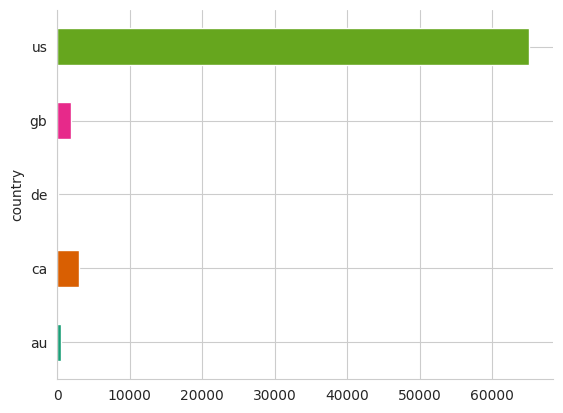

In [18]:
# country analysis

from matplotlib import pyplot as plt
import seaborn as sns
ufo_data.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

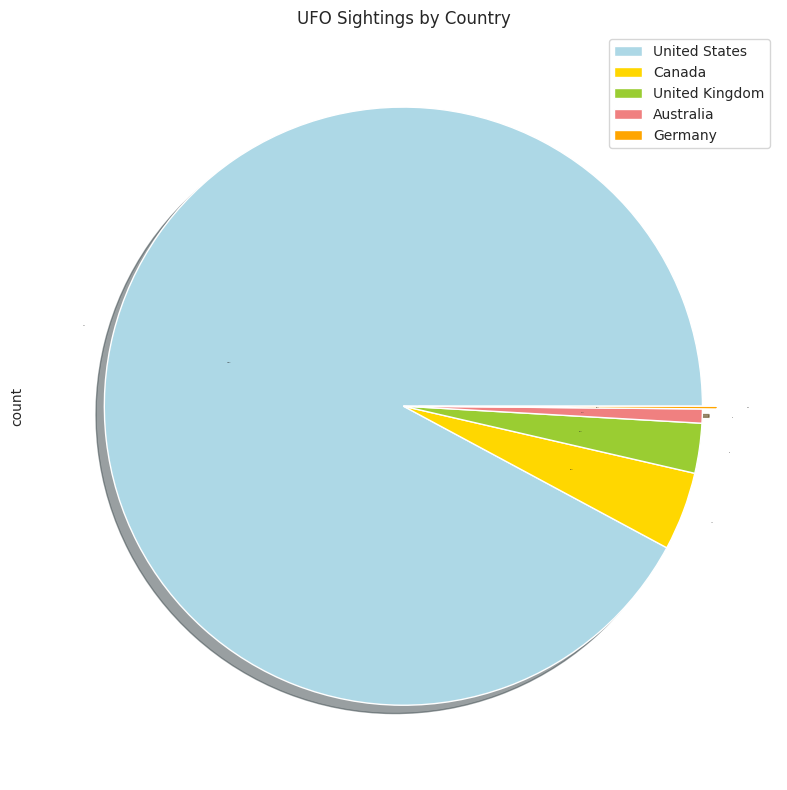

In [19]:
# country pie chart
country_sightings = ufo_data.country.value_counts()  # num ufo sightings per country

explode = (0, 0, 0, 0., 0.05)
colors = ['lightblue','gold','yellowgreen','lightcoral','orange']
country_sightings.plot(kind = 'pie', fontsize = 0, title='UFO Sightings by Country', colors=colors,
                       autopct='%1.1f%%',shadow=True, explode=explode,figsize=(8,8))
plt.legend(labels=['United States','Canada','United Kingdom','Australia','Germany'], loc="best")
plt.tight_layout()

This could mean one of two things:

1. A large amount of Americans are part reptilian alien
2. The US government is in cahoots with extra-terrestrials and is using their technology to
maintain their status as a global superpower

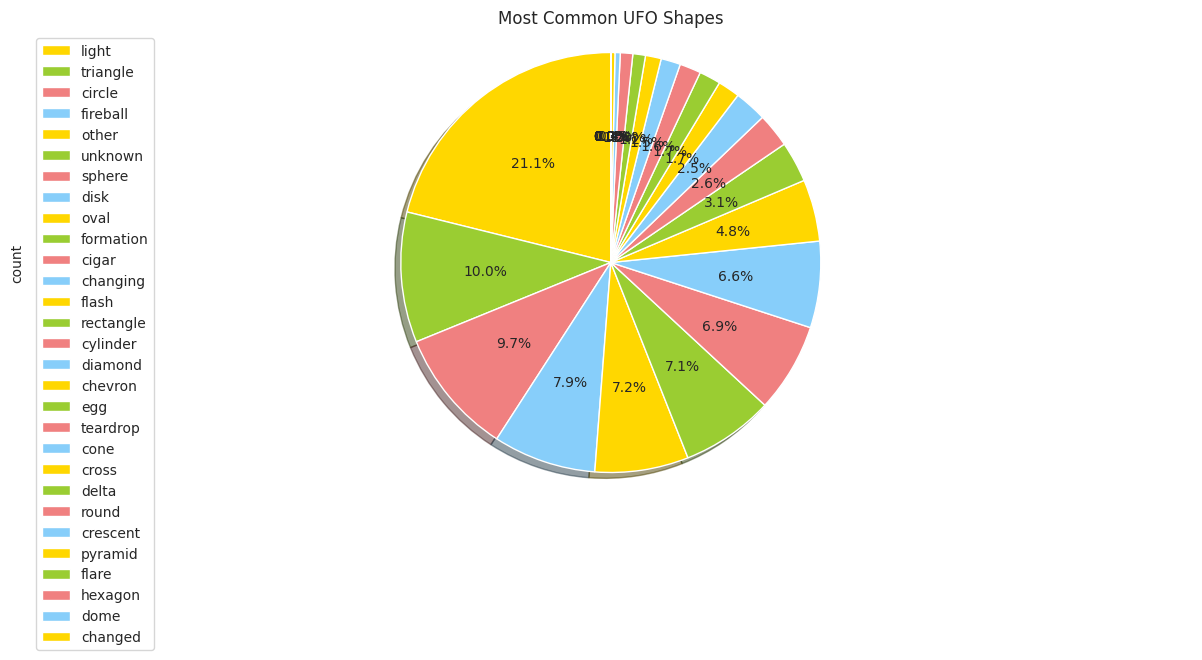

In [20]:
# @title Most Common UFO Shapes

import matplotlib.pyplot as plt

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

ufo_data['shape'].value_counts().plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, colors=colors_list, rotatelabels=True)
plt.title('Most Common UFO Shapes')
plt.axis('equal')
_ = plt.legend(labels=ufo_data['shape'].value_counts().index, loc='upper left')

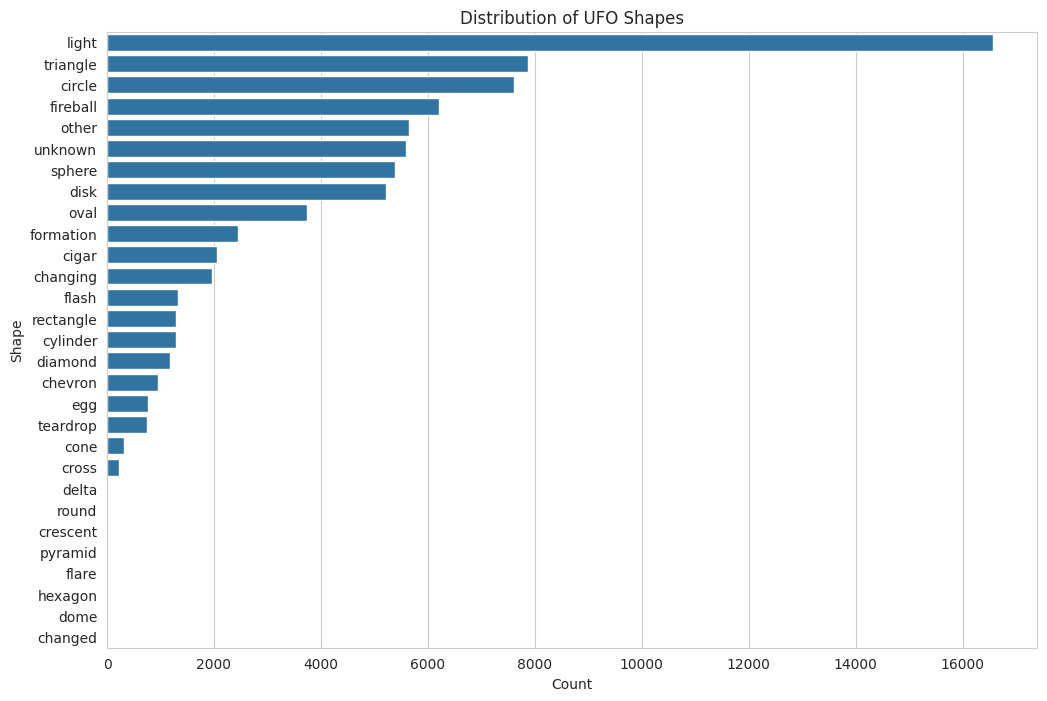

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(y='shape', data=ufo_data, order = ufo_data['shape'].value_counts().index)
plt.title('Distribution of UFO Shapes')
plt.xlabel('Count')
plt.ylabel('Shape')
plt.show()


Is there a popular time during the year that UFO sightings happen?

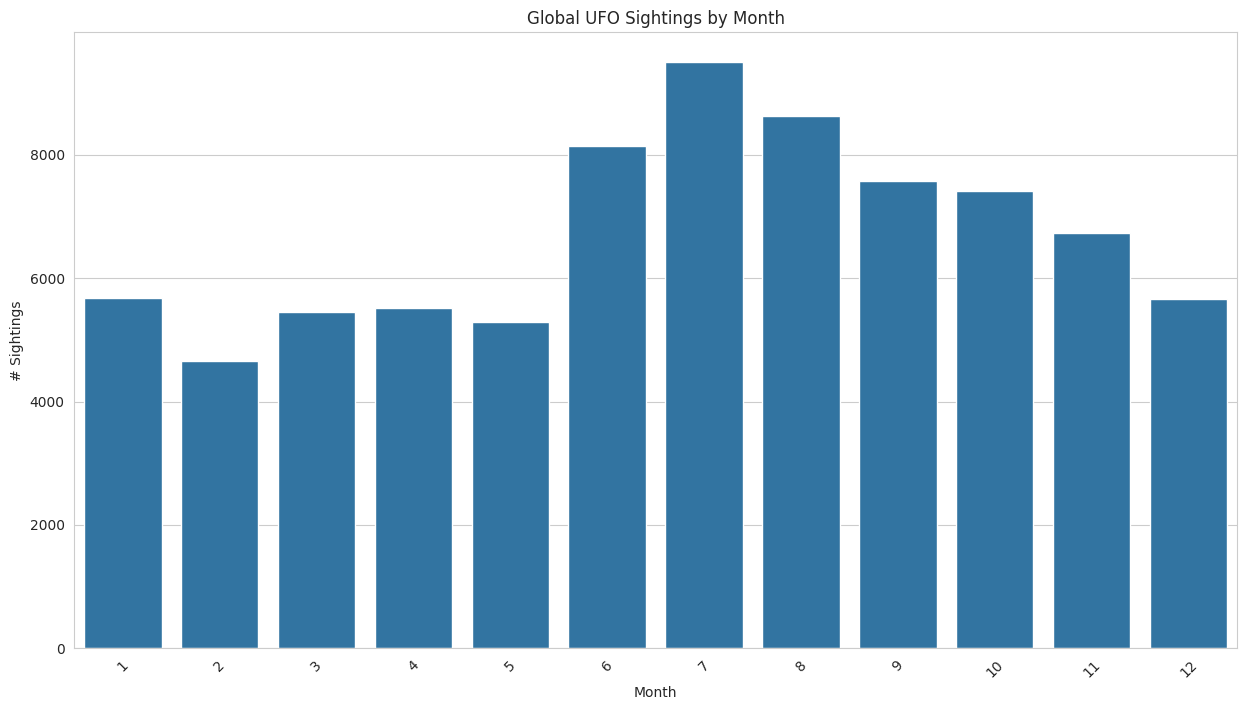

In [22]:
# Calculate monthly sighting counts and sort
m_cts = (ufo_data['datetime'].dt.month.value_counts()).sort_index()
m_ctsx = m_cts.index
m_ctsy = m_cts.values

# Create and customize bar plot
f, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=m_ctsx, y=m_ctsy)
ax.set_title('Global UFO Sightings by Month')
ax.set_xlabel('Month')
ax.set_ylabel('# Sightings')
plt.xticks(rotation=45)
plt.show()

In [23]:
numeric_cols = ufo_data.select_dtypes(include=[np.number]).columns


In [24]:
# Covariance Matrix
cov_matrix = ufo_data[numeric_cols].cov()

# Correlation Matrix
corr_matrix = ufo_data[numeric_cols].corr()

# Display Correlation Matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                    duration (seconds)  latitude  longitude       year
duration (seconds)            1.000000  0.002509    0.006384 -0.008747
latitude                      0.002509  1.000000   -0.390147  0.001602
longitude                     0.006384 -0.390147    1.000000 -0.013436
year                         -0.008747  0.001602   -0.013436  1.000000


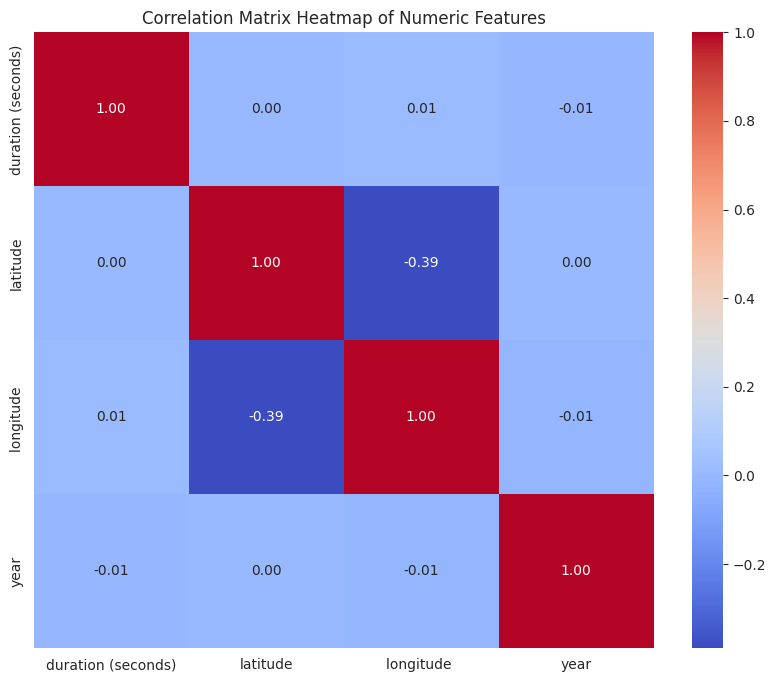

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap of Numeric Features')
plt.show()


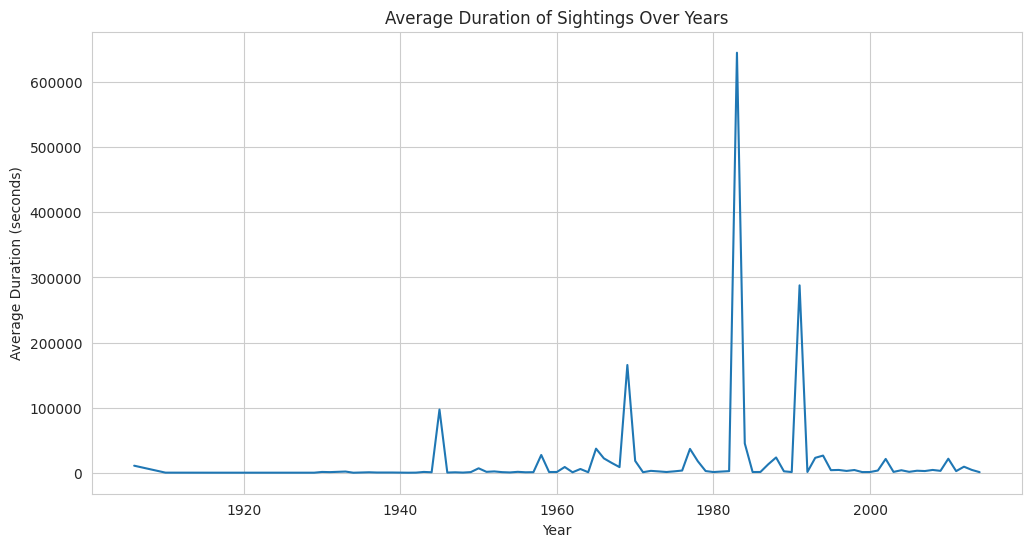

In [26]:
#average duration
ufo_data['year'] = ufo_data['datetime'].dt.year

# Plotting average duration by year
avg_duration_yearly = ufo_data.groupby('year')['duration (seconds)'].mean()

plt.figure(figsize=(12, 6))
avg_duration_yearly.plot()
plt.title('Average Duration of Sightings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.show()


In [27]:


# List of US state abbreviations
us_states = np.array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                      'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                      'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                      'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                      'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


ufo_data['state'] = ufo_data['state'].str.upper()

# Filter for UFO sightings in the United States only
ufo_usa = ufo_data[ufo_data['state'].isin(us_states)]

# Adjust latitude and longitude filters for the continental US
ufo_usa = ufo_usa[(ufo_usa['latitude'] > 24) & (ufo_usa['longitude '] < -65) & (ufo_usa['latitude'] < 50) & (ufo_usa['longitude '] > -125)]

# Remove sightings mistakenly tagged with Canada or Mexico in the 'city' column
ufo_usa = ufo_usa[~ufo_usa['city'].str.contains('\(Canada\)|\(Mexico\)')]

# Count UFO sightings per state
ufo_per_state = ufo_usa['state'].value_counts()

# Prepare data for the choropleth map
data = [go.Choropleth(
    locations = ufo_per_state.index,  # State abbreviations
    z = ufo_per_state.values,  # Number of sightings
    locationmode = 'USA-states',
    colorscale = [[0, 'rgb(229, 249, 239)'], [1, 'rgb(0, 163, 81)']],
    colorbar_title = "Number of Sightings",
    marker_line_color = 'white',  # Border line color
    marker_line_width = 2
)]

# Layout for the choropleth map
layout = go.Layout(
    title_text = 'UFO Reports by State in United States',
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,  # Lakes
        lakecolor = 'rgb(255, 255, 255)'  # Color of lakes
    )
)

# Create figure and plot
fig = go.Figure(data = data, layout = layout)
fig.show()


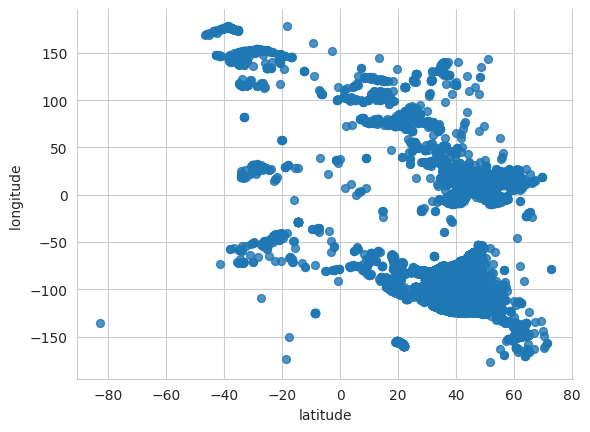

In [28]:
# @title latitude vs longitude

from matplotlib import pyplot as plt
ufo_data.plot(kind='scatter', x='latitude', y='longitude ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

##Recurring comments

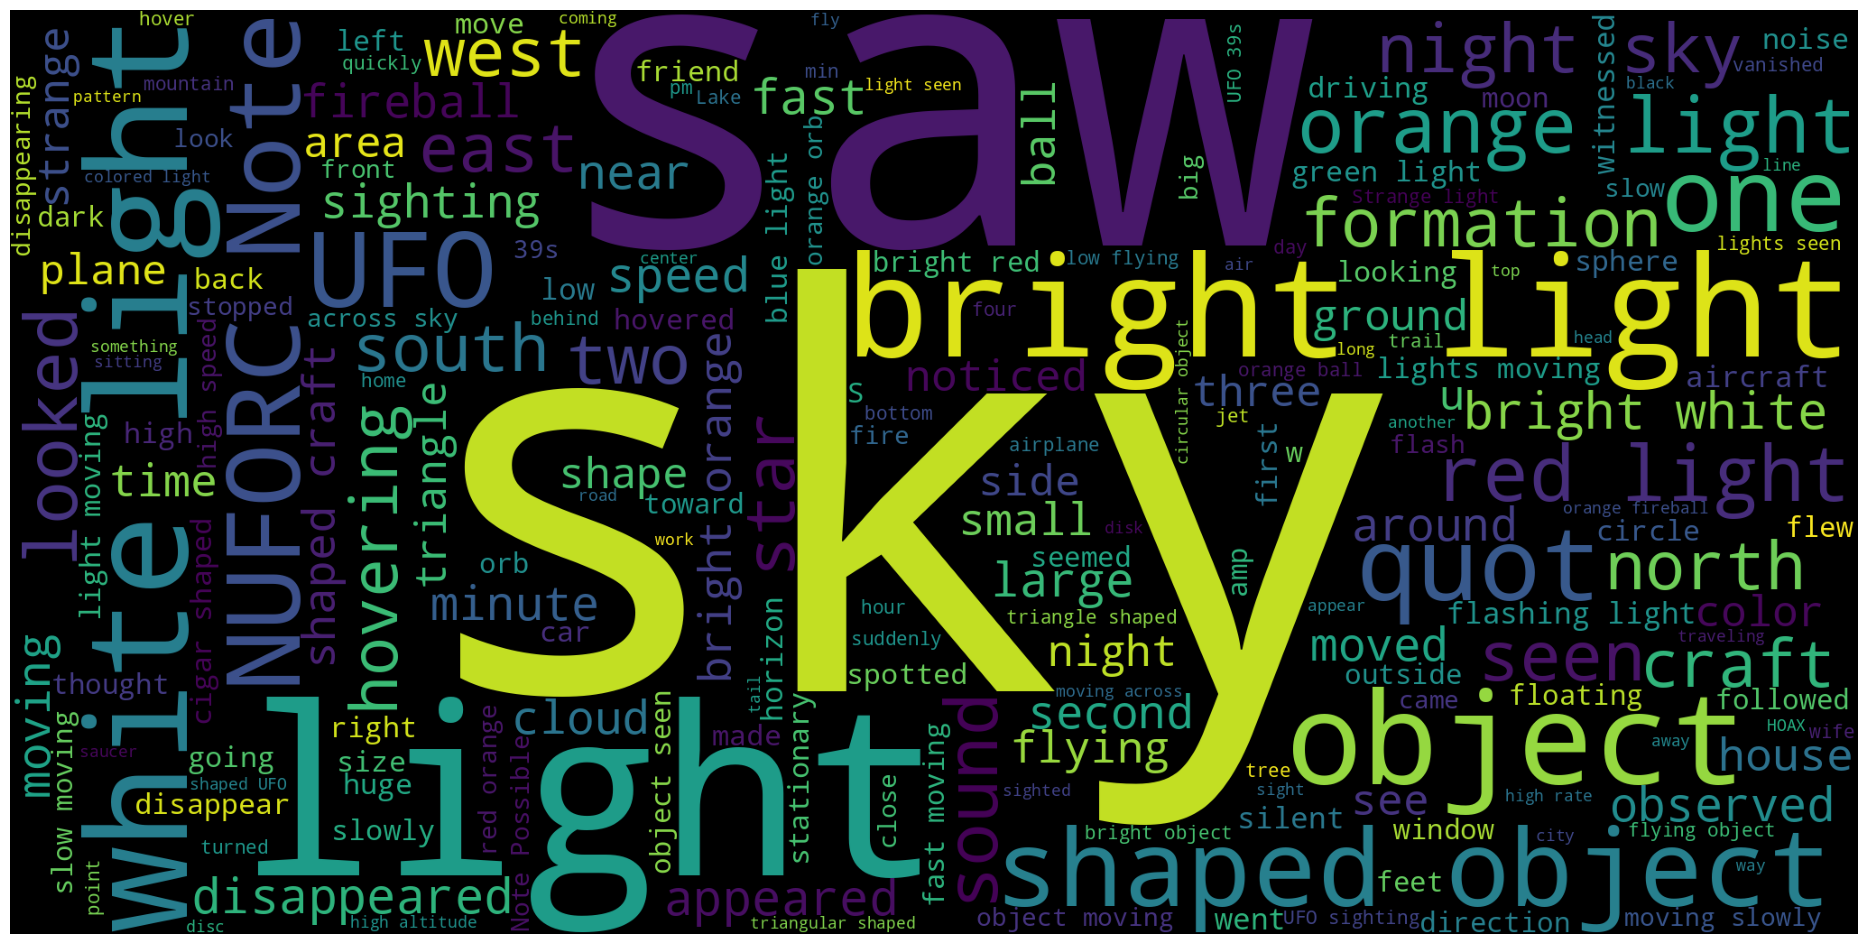

In [29]:
words = [i for i in ufo_data.comments.dropna()]

words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='black',
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

#Reflections

### Python vs Excel

Excel shines when it comes to user-friendliness. It lets you quickly get to work on basic stats, creating visuals, and crunching numbers without needing to code. It's a go-to for quick tasks or for folks who aren't too cozy with programming, thanks to its straightforward functions and features. Excel isn't just about easy calculations; you can also go the manual route. Its tools for visual presentation make organizing data a breeze, and its variety of graph options can really make your data pop.

Python, though, takes the cake for versatility and strength in deeper data analysis, cleanup, and processing. With its powerhouse libraries like pandas, numpy, and matplotlib, you're equipped for more sophisticated stats and visuals. It's also a champ at automating the mundane and tackling big data sets that might bog down Excel.

The choice between Excel and Python really boils down to what you're trying to do and how comfortable you are with each tool. For straightforward, quick tasks or when dealing with folks who prefer not to code, Excel is likely your best bet. But for the heavy lifting, bigger data, or when you're in need of complex statistical methods, Python is the way to go.

If I had a do-over for this assignment, I'd dive deeper into Python's advanced statistical capabilities and see how they measure up to what Excel can do. That deeper dive would give a clearer picture of where each tool stands out or falls short in different situations.

As for where I need to beef up my knowledge, I see a whole landscape of statistical techniques and Python libraries I've yet to explore. I'm keen on getting into time series analysis, machine learning, and statistical modeling. And on the coding front, I'm all for leveling up my efficiency and getting familiar with more Python libraries that are key for data analysis.

#Summary

This dataset offers a fascinating glimpse into the world of UFO sightings, documenting 80,330 events from 1900 to 2014 worldwide. Its analysis reveals an intriguing temporal concentration: the average sighting year is 2003, but 2006 and 2012 emerge as peak years. This points to a surge in sightings during the early 2000s, potentially reflecting greater public interest or improved technologies for reporting these occurrences. The data spans 114 years, showcasing a steady rise in sightings over time, particularly noted in the initial decade of the 21st century.

Shapes like lights and triangles were the most reported, suggesting these forms are commonly associated with UFOs. Geographically, the data spans major cities across the globe, with North America leading in reports. Seattle, Phoenix, and Portland are highlighted as key hotspots, alongside significant sightings in international cities like London and Toronto. This wide geographical distribution emphasizes the global nature of UFO phenomena, suggesting these sightings are not restricted to any one region.

this dataset provides a compelling overview of UFO sightings, emphasizing a notable increase in the 21st century and a broad geographic spread. It sheds light on both the temporal and spatial dimensions of these phenomena and suggests that evolving societal and technological advancements could be influencing the frequency and reporting of such mysterious events.






